# Impor Library

Tahap ini bertujuan untuk memuat semua pustaka (libraries) Python yang diperlukan untuk keperluan analisis data dan pembuatan model machine learning. Setiap pustaka memiliki fungsi khusus yang mendukung berbagai proses dalam proyek ini.

In [337]:
# Import all libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import joblib
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import cross_val_score, KFold
from sklearn.svm import SVR

# Data Loading

Tahap ini bertujuan untuk mengimpor dataset sehingga data tersebut dapat digunakan untuk proses selanjutnya. Setelah dimuat, data akan disimpan dalam struktur yang tepat guna mempermudah proses manipulasi, eksplorasi, dan analisis di tahap berikutnya.

In [338]:
# download dataset dari google drive https://drive.google.com/file/d/1lXUDuuguGHsrfmje5qw_CwYKcJ1lyuJN/view?usp=sharing
!gdown 1FO4hMbHi4nYztC5bTCisOJi2G4mbh2OI

Downloading...
From: https://drive.google.com/uc?id=1FO4hMbHi4nYztC5bTCisOJi2G4mbh2OI
To: /content/restaurant.csv
100% 911k/911k [00:00<00:00, 12.4MB/s]


In [339]:
df = pd.read_csv('restaurant.csv')
df.head()

,Name,Location,Cuisine,Rating,Seating Capacity,Average Meal Price,Marketing Budget,Social Media Followers,Chef Experience Years,Number of Reviews,Avg Review Length,Ambience Score,Service Quality Score,Parking Availability,Weekend Reservations,Weekday Reservations,Revenue
0,Restaurant 0,Rural,Japanese,4.00,38,73.98,2224,23406,13,185,161.92,1.30,7.00,Yes,13,4,"638,945.52"
1,Restaurant 1,Downtown,Mexican,3.20,76,28.11,4416,42741,8,533,148.76,2.60,3.40,Yes,48,6,"490,207.83"
2,Restaurant 2,Rural,Italian,4.70,48,48.29,2796,37285,18,853,56.85,5.30,6.70,No,27,14,"541,368.62"
3,Restaurant 3,Rural,Italian,4.40,34,51.55,1167,15214,13,82,205.43,4.60,2.80,Yes,9,17,"404,556.80"
4,Restaurant 4,Downtown,Japanese,4.90,88,75.98,3639,40171,9,78,241.68,8.60,2.10,No,37,26,"1,491,046.35"


# Data Understanding

- Dataset yang digunakan adalah **Restaurant Revenue Prediction Dataset** yang diunduh dari platform Kaggle.

- Dataset ini mencakup informasi seperti lokasi restoran, jenis masakan (cuisine), kapasitas tempat duduk, anggaran pemasaran, jumlah pengikut media sosial, pengalaman koki, jumlah ulasan pelanggan, skor kualitas layanan, suasana restoran, hingga jumlah reservasi mingguan. Semua fitur tersebut relevan sebagai faktor penentu dalam memprediksi total pendapatan sebuah restoran.

- Tahap Data Understanding bertujuan untuk memahami karakteristik dataset, mengenali faktor-faktor yang memengaruhi revenue restoran, serta mengeksplorasi hubungan antar variabel. Selain itu, tahap ini juga membantu mengidentifikasi potensi masalah data seperti missing values atau outlier sebagai dasar langkah analisis berikutnya.

In [340]:
# Menampilkan informasi tipe data tiap kolom, jumlah non-null serta ukuran data
print("Informasi dasar dataset:")
df.info()

Informasi dasar dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8368 entries, 0 to 8367
Data columns (total 17 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Name                    8368 non-null   object 
 1   Location                8368 non-null   object 
 2   Cuisine                 8368 non-null   object 
 3   Rating                  8368 non-null   float64
 4   Seating Capacity        8368 non-null   int64  
 5   Average Meal Price      8368 non-null   float64
 6   Marketing Budget        8368 non-null   int64  
 7   Social Media Followers  8368 non-null   int64  
 8   Chef Experience Years   8368 non-null   int64  
 9   Number of Reviews       8368 non-null   int64  
 10  Avg Review Length       8368 non-null   float64
 11  Ambience Score          8368 non-null   float64
 12  Service Quality Score   8368 non-null   float64
 13  Parking Availability    8368 non-null   object 
 14  Weekend Reserva

In [341]:
# Menampilkan statistik deskriptif dasar seperti mean, max, min, std dan lainnya untuk kolom numerik
print("Deskripsi statistik dataset:")
df.describe().T

Deskripsi statistik dataset:


,count,mean,std,min,25%,50%,75%,max
Rating,"8,368.00",4.01,0.58,3.00,3.50,4.00,4.50,5.00
Seating Capacity,"8,368.00",60.21,17.40,30.00,45.00,60.00,75.00,90.00
Average Meal Price,"8,368.00",47.90,14.34,25.00,35.49,45.53,60.30,76.00
Marketing Budget,"8,368.00","3,218.25","1,824.90",604.00,"1,889.00","2,846.50","4,008.50","9,978.00"
Social Media Followers,"8,368.00","36,190.62","18,630.15","5,277.00","22,592.50","32,518.50","44,566.25","103,777.00"
Chef Experience Years,"8,368.00",10.05,5.52,1.00,5.00,10.00,15.00,19.00
Number of Reviews,"8,368.00",523.01,277.22,50.00,277.00,528.00,764.25,999.00
Avg Review Length,"8,368.00",174.77,72.00,50.01,113.31,173.91,237.41,299.98
Ambience Score,"8,368.00",5.52,2.58,1.00,3.30,5.50,7.80,10.00
Service Quality Score,"8,368.00",5.51,2.59,1.00,3.20,5.60,7.80,10.00


In [342]:
# Menampilkan statistik fitur kategorikal
df.describe(include='object').T

,count,unique,top,freq
Name,8368,8368,Restaurant 8351,1
Location,8368,3,Downtown,2821
Cuisine,8368,6,French,1433
Parking Availability,8368,2,Yes,4189


In [343]:
# Memeriksa dan menampilkan missing value pada dataset
df.isnull().sum()

,0
Name,0
Location,0
Cuisine,0
Rating,0
Seating Capacity,0
Average Meal Price,0
Marketing Budget,0
Social Media Followers,0
Chef Experience Years,0
Number of Reviews,0


In [344]:
# Memeriksa dan menampilkan jumlah duplikasi data
duplicate_rows = df.duplicated().sum()
print("Jumlah baris duplikat:", duplicate_rows)

Jumlah baris duplikat: 0


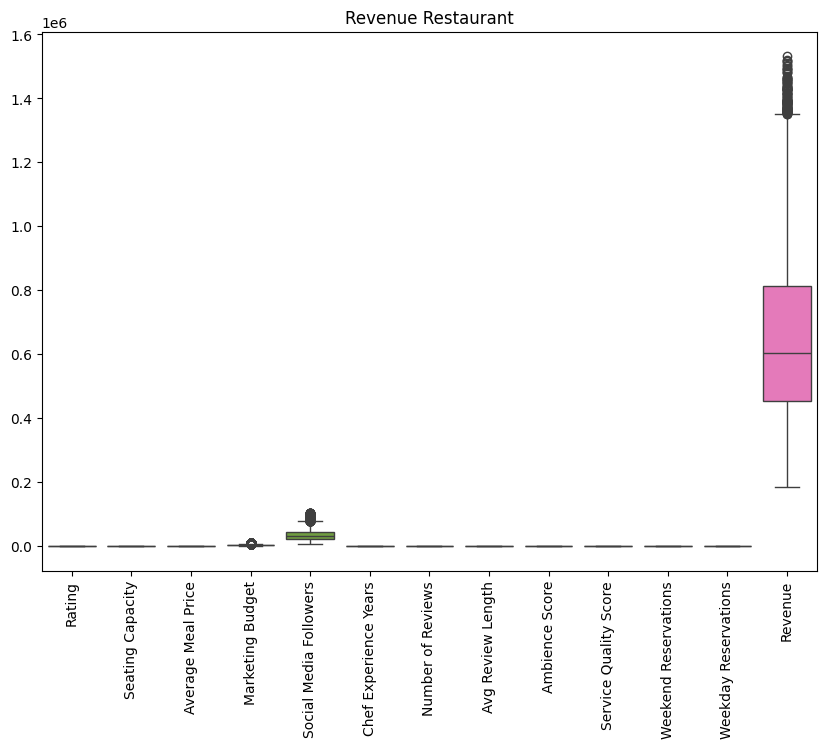

In [345]:
# Memeriksa outlier
plt.subplots(figsize=(10,7))
sns.boxplot(data=df).set_title("Revenue Restaurant")
plt.xticks(rotation=90)
plt.show()

Boxplot menunjukkan bahwa **Revenue** memiliki banyak outlier, menandakan adanya restoran dengan pendapatan jauh di atas rata-rata, seperti restoran premium atau waralaba. **Marketing Budget** dan **Social Media Followers** juga memiliki outlier, meskipun tidak se-ekstrem Revenue. Sementara fitur lainnya lebih simetris. Outlier ini perlu diperhatikan karena dapat memengaruhi akurasi model prediksi.


## Exploratory Data Analysis

Tahapan EDA (Exploratory Data Analysis) bertujuan untuk memahami karakteristik dataset restoran, mengidentifikasi pola, hubungan antar variabel, serta memvisualisasikan data guna memperoleh insight awal. Analisis ini membantu menjawab rumusan masalah seperti:

1. Bagaimana cara melakukan prediksi pendapatan restoran menggunakan model machine learning berdasarkan faktor-faktor seperti lokasi, jenis masakan, kapasitas tempat duduk, dan strategi pemasaran?

2. Fitur apa yang paling mempengaruhi revenue restoran?

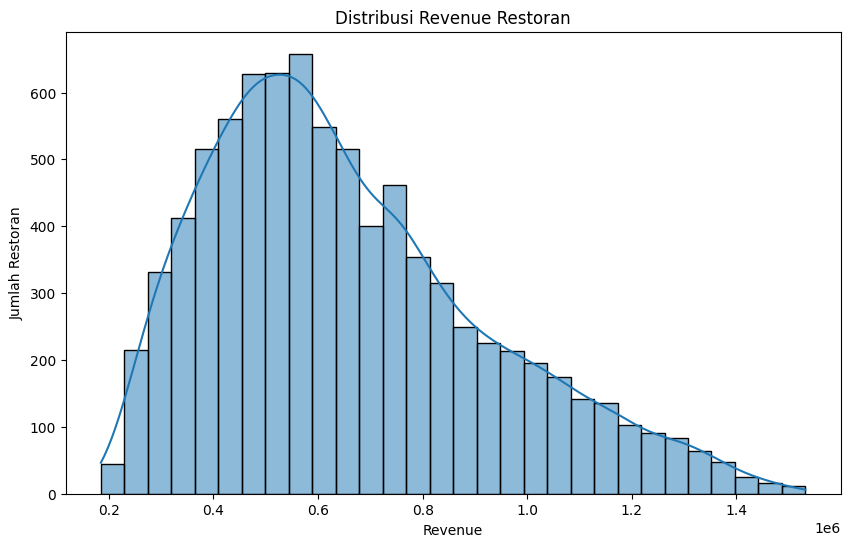

In [346]:
# Visualisasi distribusi target (Revenue)
plt.figure(figsize=(10, 6))
sns.histplot(df['Revenue'], bins=30, kde=True)
plt.title('Distribusi Revenue Restoran')
plt.xlabel('Revenue')
plt.ylabel('Jumlah Restoran')
plt.show()

Distribusi Revenue divisualisasikan menggunakan histogram yang menunjukkan sebagian besar restoran dalam dataset memiliki pendapatan (revenue) berkisar antara 400.000 hingga 600.000. Grafik memperlihatkan distribusi data yang condong ke kanan (right-skewed), di mana sebagian kecil restoran memiliki revenue di atas 1 juta, namun mayoritas berada di kisaran menengah. Hal ini menunjukkan bahwa pendapatan tinggi hanya dimiliki oleh segelintir restoran, sementara sebagian besar lainnya berada pada tingkat pendapatan menengah.

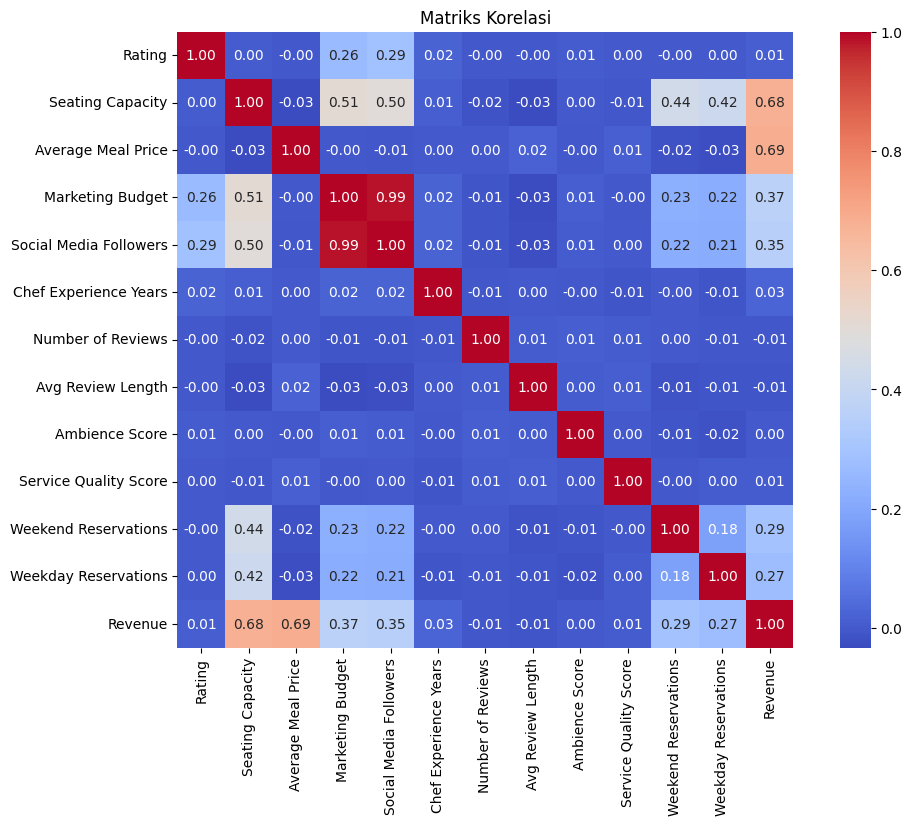

In [347]:
# Korelasi antar fitur
numeric_df = df.select_dtypes(exclude="object")
correlation_matrix = numeric_df.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True)
plt.title('Matriks Korelasi')
plt.show()

Heatmap korelasi menunjukkan bahwa Seating Capacity dan Average Meal Price memiliki korelasi positif tertinggi dengan revenue (sekitar 0.68-0.69), diikuti oleh Marketing Budget dan Social Media Followers. Fitur-fitur lain seperti Service Quality Score dan Ambience Score menunjukkan korelasi lemah terhadap revenue. Korelasi tinggi antara Marketing Budget dan Social Media Followers (0.99) mengindikasikan potensi multikolinearitas yang perlu diantisipasi saat pemodelan.

<ipython-input-348-c8665bdbe569>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=corr_target.values[:5], y=corr_target.index[:5], palette='viridis')


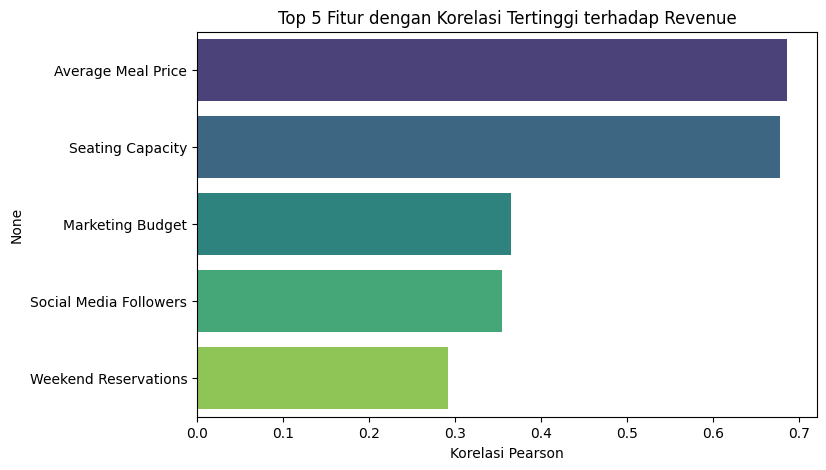

In [348]:
# Visualisasi Korelasi Revenue dengan fitur lain
corr = df.select_dtypes(include=np.number).corr()
corr_target = corr['Revenue'].drop('Revenue').sort_values(ascending=False)

plt.figure(figsize=(8,5))
sns.barplot(x=corr_target.values[:5], y=corr_target.index[:5], palette='viridis')
plt.title('Top 5 Fitur dengan Korelasi Tertinggi terhadap Revenue')
plt.xlabel('Korelasi Pearson')
plt.show()


Grafik menunjukkan bahwa **Average Meal Price** dan **Seating Capacity** memiliki korelasi tertinggi dengan pendapatan restoran, mendekati 0.7, menandakan hubungan positif yang kuat. Sementara fitur seperti **Marketing Budget**, **Social Media Followers**, dan **Weekend Reservations** juga berkontribusi, pengaruhnya lebih lemah. Ini mengindikasikan bahwa faktor harga dan kapasitas merupakan penentu utama revenue dibandingkan faktor lainnya.


In [349]:
# Salin data asli hanya untuk visualisasi
df_vis = df.copy()

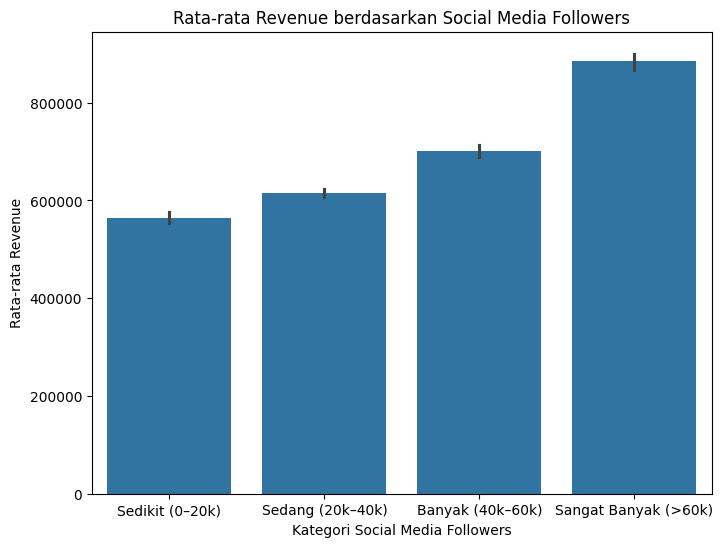

In [350]:
# Visualisasi Social Media Followers terhadap Revenue
bins_sm = [0, 20000, 40000, 60000, df_vis['Social Media Followers'].max()]
labels_sm = ['Sedikit (0–20k)', 'Sedang (20k–40k)', 'Banyak (40k–60k)', 'Sangat Banyak (>60k)']
df_vis['Kategori_Pengikut_Medsos'] = pd.cut(df_vis['Social Media Followers'], bins=bins_sm, labels=labels_sm)

plt.figure(figsize=(8,6))
sns.barplot(data=df_vis, x='Kategori_Pengikut_Medsos', y='Revenue', estimator='mean')
plt.title('Rata-rata Revenue berdasarkan Social Media Followers')
plt.xlabel('Kategori Social Media Followers')
plt.ylabel('Rata-rata Revenue')
plt.show()


Grafik menunjukkan bahwa semakin banyak pengikut media sosial, semakin tinggi rata-rata pendapatan restoran. Restoran dengan lebih dari 60k pengikut mencatatkan pendapatan tertinggi, mendekati Rp900.000, menandakan pentingnya strategi pemasaran digital dalam meningkatkan performa keuangan.


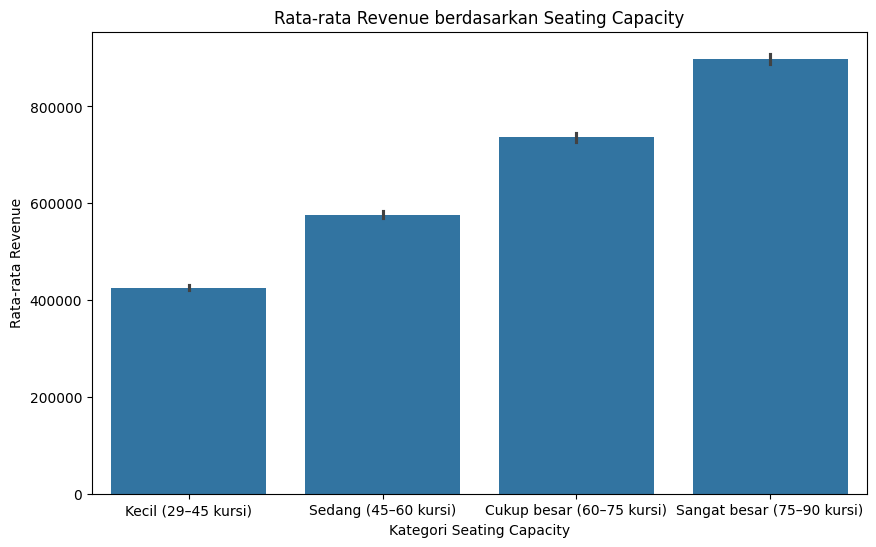

In [351]:
# Visualisasi Seating Capacity terhadap Revenue
bins_seat = [29.9, 45.0, 60.0, 75.0, 90.0]
labels_seat = ['Kecil (29–45 kursi)', 'Sedang (45–60 kursi)', 'Cukup besar (60–75 kursi)', 'Sangat besar (75–90 kursi)']
df_vis['Kategori_Kapasitas_TempatDuduk'] = pd.cut(df_vis['Seating Capacity'], bins=bins_seat, labels=labels_seat)

plt.figure(figsize=(10,6))
sns.barplot(data=df_vis, x='Kategori_Kapasitas_TempatDuduk', y='Revenue', estimator='mean')
plt.title('Rata-rata Revenue berdasarkan Seating Capacity')
plt.xlabel('Kategori Seating Capacity')
plt.ylabel('Rata-rata Revenue')
plt.show()

Grafik menunjukkan bahwa semakin besar kapasitas tempat duduk, semakin tinggi rata-rata pendapatan restoran. Restoran dengan kapasitas sangat besar (75–90 kursi) mencatatkan pendapatan tertinggi, mendekati Rp900.000. Ini menunjukkan bahwa kapasitas duduk berperan penting dalam meningkatkan potensi pemasukan.


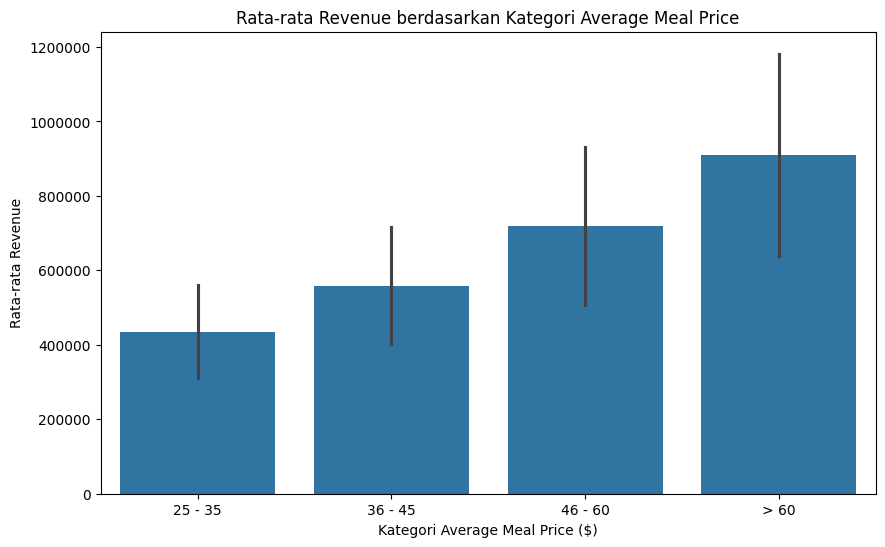

In [352]:
# Visualisasi Average Meal Price terhadap Revenue
min_price = df_vis['Average Meal Price'].min()
q1 = df_vis['Average Meal Price'].quantile(0.25)
q2 = df_vis['Average Meal Price'].quantile(0.50)
q3 = df_vis['Average Meal Price'].quantile(0.75)
max_price = df_vis['Average Meal Price'].max()
bins_price = [min_price, q1, q2, q3, max_price]
labels_price = [
    rf'{int(min_price)} - {int(q1)}',
    rf'{int(q1)+1} - {int(q2)}',
    rf'{int(q2)+1} - {int(q3)}',
    rf'> {int(q3)}'
]
df_vis['Kategori_Harga_Makanan'] = pd.cut(df_vis['Average Meal Price'], bins=bins_price, labels=labels_price)

plt.figure(figsize=(10,6))
sns.barplot(data=df_vis, x='Kategori_Harga_Makanan', y='Revenue', estimator='mean', errorbar='sd')
plt.title('Rata-rata Revenue berdasarkan Kategori Average Meal Price')
plt.xlabel('Kategori Average Meal Price ($)')
plt.ylabel('Rata-rata Revenue')
plt.ticklabel_format(style='plain', axis='y')
plt.show()



Grafik menunjukkan bahwa semakin tinggi rata-rata harga makanan, semakin besar rata-rata pendapatan restoran. Restoran dengan harga sangat mahal (>60) mencatatkan pendapatan tertinggi, mendekati Rp900.000. Hal ini mengindikasikan bahwa strategi harga tinggi dapat meningkatkan revenue, meskipun efektivitasnya tetap bergantung pada daya beli dan preferensi pasar.


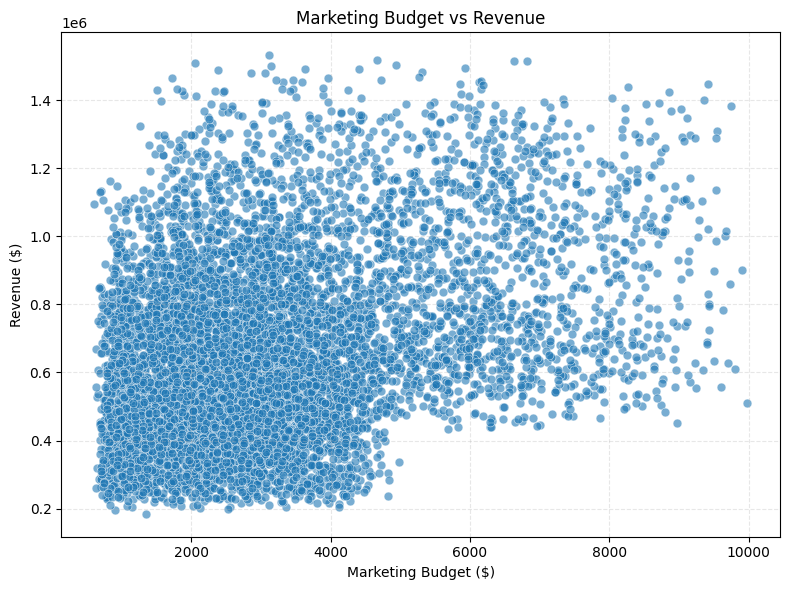

In [353]:
# Visualisasi Marketing Budget vs Revenue
plt.figure(figsize=(8,6))
sns.scatterplot(data=df, x='Marketing Budget', y='Revenue', alpha=0.6, s=40)
plt.title('Marketing Budget vs Revenue')
plt.xlabel('Marketing Budget ($)')
plt.ylabel('Revenue ($)')
plt.grid(True, linestyle='--', alpha=0.3)
plt.tight_layout()
plt.show()


Scatterplot antara Marketing Budget dan Revenue menunjukkan hubungan positif, di mana peningkatan anggaran pemasaran cenderung diikuti kenaikan pendapatan. Namun, sebaran data yang lebar mengindikasikan bahwa hubungan ini tidak sepenuhnya linier dan dipengaruhi oleh faktor lain seperti jenis masakan, lokasi, atau kualitas layanan.


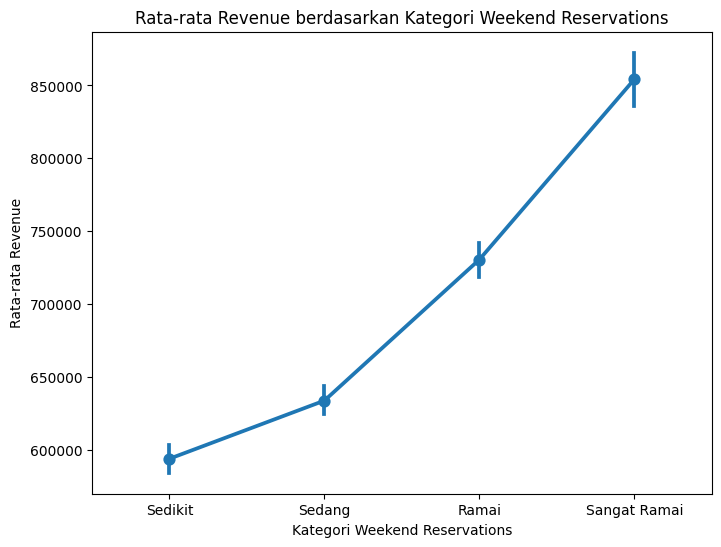

In [354]:
# Visualisasi Revenue dengan Weekend Reservations
bins_res = [0, 20, 40, 60, df_vis['Weekend Reservations'].max()]
labels_res = ['Sedikit', 'Sedang', 'Ramai', 'Sangat Ramai']
df_vis['Weekend_Reservations_Category'] = pd.cut(df_vis['Weekend Reservations'], bins=bins_res, labels=labels_res)

plt.figure(figsize=(8,6))
sns.pointplot(data=df_vis, x='Weekend_Reservations_Category', y='Revenue', estimator='mean')
plt.title('Rata-rata Revenue berdasarkan Kategori Weekend Reservations')
plt.xlabel('Kategori Weekend Reservations')
plt.ylabel('Rata-rata Revenue')
plt.show()


Grafik menunjukkan bahwa semakin banyak reservasi di akhir pekan, semakin tinggi rata-rata pendapatan restoran. Restoran yang sangat sibuk saat akhir pekan mencatatkan pendapatan tertinggi, melebihi Rp850.000. Hal ini menegaskan pentingnya akhir pekan sebagai momen strategis untuk meningkatkan penjualan melalui reservasi dan promosi yang tepat.


## Data Preparation

Tahap ini tujuannya adalah untuk mengubah data mentah menjadi format yang sesuai, bersih, dan informatif sehingga dapat digunakan secara efektif untuk membangun dan mengevaluasi model prediksi.

In [355]:
# Menghapus kolom 'Name' yang tidak dibutuhkan dalam analisis
df.drop(['Name'], axis=1, inplace=True)
df.head()

,Location,Cuisine,Rating,Seating Capacity,Average Meal Price,Marketing Budget,Social Media Followers,Chef Experience Years,Number of Reviews,Avg Review Length,Ambience Score,Service Quality Score,Parking Availability,Weekend Reservations,Weekday Reservations,Revenue
0,Rural,Japanese,4.00,38,73.98,2224,23406,13,185,161.92,1.30,7.00,Yes,13,4,"638,945.52"
1,Downtown,Mexican,3.20,76,28.11,4416,42741,8,533,148.76,2.60,3.40,Yes,48,6,"490,207.83"
2,Rural,Italian,4.70,48,48.29,2796,37285,18,853,56.85,5.30,6.70,No,27,14,"541,368.62"
3,Rural,Italian,4.40,34,51.55,1167,15214,13,82,205.43,4.60,2.80,Yes,9,17,"404,556.80"
4,Downtown,Japanese,4.90,88,75.98,3639,40171,9,78,241.68,8.60,2.10,No,37,26,"1,491,046.35"


In [356]:
# Penanganan outlier
numeric_restaurant = df.select_dtypes(include=np.number)

Q1 = numeric_restaurant.quantile(0.25)
Q3 = numeric_restaurant.quantile(0.75)
IQR = Q3-Q1

outlier_condition = (numeric_restaurant < (Q1 - 1.5 * IQR)) | (numeric_restaurant > (Q3 + 1.5 * IQR))
df = df[~outlier_condition.any(axis=1)]

df.shape

(7879, 16)

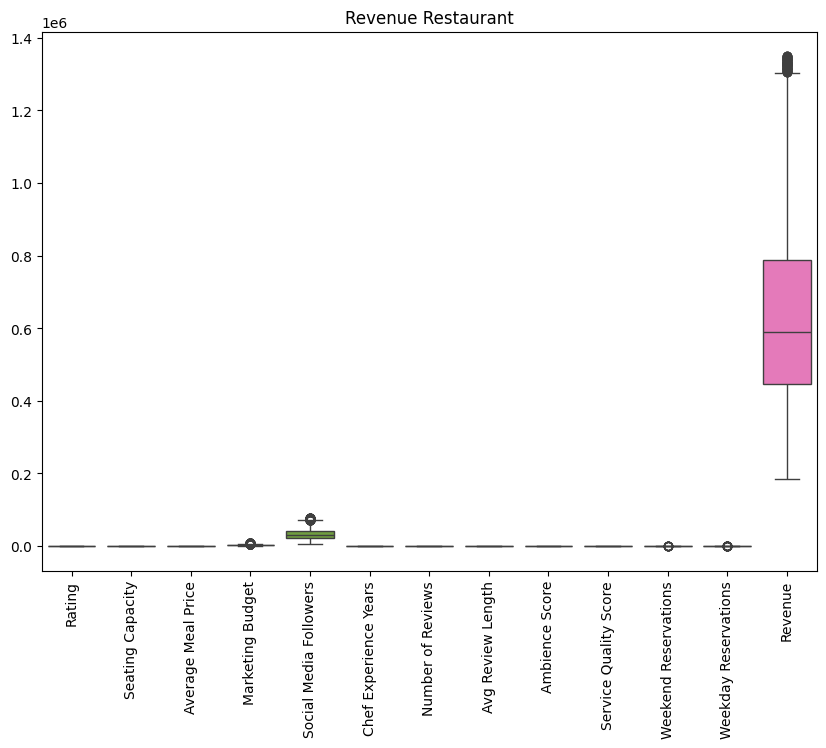

In [357]:
# Visualisasi setelah penanganan outlier
plt.subplots(figsize=(10,7))
sns.boxplot(data=df).set_title("Revenue Restaurant")
plt.xticks(rotation=90)
plt.show()

Setelah penanganan outlier, distribusi **Revenue** dan beberapa fitur lain seperti **Marketing Budget**, **Social Media Followers**, serta **Weekend/Weekday Reservations** menjadi lebih stabil dan tidak lagi didominasi nilai ekstrem. Jumlah outlier berkurang, menunjukkan data telah dibatasi atau ditransformasi. Hal ini membantu meningkatkan akurasi dan keandalan model prediktif karena data menjadi lebih bersih dan representatif.


### Data Splitting

Tahap ini membagi dataset menjadi data latih (80%) dan data uji (20%) menggunakan fungsi train_test_split dari sklearn. Parameter random_state=42 memastikan hasil pembagian data selalu konsisten. Data latih digunakan untuk melatih model, sedangkan data uji dipakai untuk mengevaluasi performa model pada data baru.

In [358]:
# Membagi dataset menjadi data latih dan data uji
df.drop(columns=['Unnamed: 0'], inplace=True, errors='ignore')
X = df.drop('Revenue', axis=1)
y = df['Revenue']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [359]:
print(f"Jumlah data latih (target): {y_train.count()}")
print(f"Jumlah data test (target): {y_test.count()}")

Jumlah data latih (target): 6303
Jumlah data test (target): 1576


### Identifikasi Jenis Kolom Kategorikal dan Numerikal

In [360]:
# Mengidentifikasi kolom kategorikal
categorical_features = df.select_dtypes(include='object').columns
print("Fitur Kategorikal:", categorical_features)

Fitur Kategorikal: Index(['Location', 'Cuisine', 'Parking Availability'], dtype='object')


Kolom kategorikal diidentifikasi dengan select_dtypes(include='object'), seperti location, cuisine, dan parking availability. Fitur-fitur ini nantinya perlu diubah menjadi representasi numerik melalui encoding sebelum digunakan dalam model machine learning.

In [361]:
# Mengidentifikasi kolom numerik
numerical_features = X.select_dtypes(include=np.number).columns
print("Fitur Numerikal:", numerical_features)

Fitur Numerikal: Index(['Rating', 'Seating Capacity', 'Average Meal Price', 'Marketing Budget',
       'Social Media Followers', 'Chef Experience Years', 'Number of Reviews',
       'Avg Review Length', 'Ambience Score', 'Service Quality Score',
       'Weekend Reservations', 'Weekday Reservations'],
      dtype='object')


Tahap ini bertujuan mengidentifikasi kolom numerik dalam DataFrame X menggunakan select_dtypes(include=np.number). Kolom-kolom seperti seating capacity, average meal price, marketing budget, revenue, dan lain-lain termasuk dalam kategori numerik, dan akan diproses lebih lanjut sesuai kebutuhan analisis dan modeling.

## Data Encoding

Data Encoding dilakukan setelah memisahkan data train dan data test. Encoding yang dilakukan menggunakan ColumnTransformer untuk menerapkan transformasi yang berbeda pada kolom yang berbeda pada data. Encoder OneHotEncoder diterapkan pada fitur-fitur kategorikal untuk mengubahnya menjadi format numerik yang dapat dipahami oleh model machine learning.

In [362]:
# Menggunakan ColumnTransformer untuk menerapkan transformasi yang berbeda pada kolom yang berbeda
preprocessor_drop_model = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features),
        ('num', 'passthrough', numerical_features)],
    remainder='drop')

X_train_processed_drop = preprocessor_drop_model.fit_transform(X_train)
X_test_processed_drop = preprocessor_drop_model.transform(X_test)

In [363]:
# Mengubah hasil encoding menjadi DataFrame
feature_names_cat = preprocessor_drop_model.named_transformers_['cat'].get_feature_names_out(categorical_features)
feature_names_processed_drop = list(feature_names_cat) + list(numerical_features)

X_train_processed_drop_dense = X_train_processed_drop
X_test_processed_drop_dense = X_test_processed_drop

X_train_processed_drop_df = pd.DataFrame(X_train_processed_drop_dense, columns=feature_names_processed_drop)
X_test_processed_drop_df = pd.DataFrame(X_test_processed_drop_dense, columns=feature_names_processed_drop)

print(X_train_processed_drop_df.head())
print(X_test_processed_drop_df.head())

   Location_Downtown  Location_Rural  Location_Suburban  Cuisine_American  \
0               0.00            0.00               1.00              1.00   
1               1.00            0.00               0.00              0.00   
2               1.00            0.00               0.00              0.00   
3               0.00            1.00               0.00              0.00   
4               0.00            1.00               0.00              0.00   

   Cuisine_French  Cuisine_Indian  Cuisine_Italian  Cuisine_Japanese  \
0            0.00            0.00             0.00              0.00   
1            0.00            0.00             0.00              0.00   
2            1.00            0.00             0.00              0.00   
3            0.00            0.00             1.00              0.00   
4            1.00            0.00             0.00              0.00   

   Cuisine_Mexican  Parking Availability_No  ...  Average Meal Price  \
0             0.00              

## Standardisasi

In [364]:
# Standardisasi Fitur Numerik untuk model KNN dan SVR
scaler = StandardScaler()
# Standardisasi variabel X
X_train_scaled = scaler.fit_transform(X_train_processed_drop_df)
X_test_scaled = scaler.transform(X_test_processed_drop_df)
# Standardisasi target Y
y_scaler = StandardScaler()
y_train_scaled = y_scaler.fit_transform(y_train.values.reshape(-1, 1)).ravel()

# Ubah kembali ke DataFrame
X_train_scaled_df = pd.DataFrame(X_train_scaled, columns=X_train_processed_drop_df.columns)
X_test_scaled_df = pd.DataFrame(X_test_scaled, columns=X_test_processed_drop_df.columns)

In [365]:
# Mencetak beberapa baris pertama dari DataFrame data latih dan data uji yang sudah diproses
print("\nData Latih yang Sudah Diproses (tanpa fitur 'Revenue'):")
print(X_train_processed_drop_df.head())

print("\nData Uji yang Sudah Diproses (tanpa fitur 'Revenue'):")
print(X_test_processed_drop_df.head())

# Mencetak bentuk (jumlah baris dan kolom) dari DataFrame data latih dan data uji untuk memverifikasi dimensi data setelah encoding.
print("\nBentuk X_train_processed_drop_df:", X_train_processed_drop_df.shape)
print("Bentuk X_test_processed_drop_df:", X_test_processed_drop_df.shape)
print("Jumlah kolom pada DataFrame:", len(X_train_processed_drop_df.columns))


Data Latih yang Sudah Diproses (tanpa fitur 'Revenue'):
   Location_Downtown  Location_Rural  Location_Suburban  Cuisine_American  \
0               0.00            0.00               1.00              1.00   
1               1.00            0.00               0.00              0.00   
2               1.00            0.00               0.00              0.00   
3               0.00            1.00               0.00              0.00   
4               0.00            1.00               0.00              0.00   

   Cuisine_French  Cuisine_Indian  Cuisine_Italian  Cuisine_Japanese  \
0            0.00            0.00             0.00              0.00   
1            0.00            0.00             0.00              0.00   
2            1.00            0.00             0.00              0.00   
3            0.00            0.00             1.00              0.00   
4            1.00            0.00             0.00              0.00   

   Cuisine_Mexican  Parking Availability_No  ..

# Modelling

Tujuan tahap ini untuk membangun model machine learning yang mampu membuat prediksi yang akurat dan dapat diandalkan pada data baru yang belum pernah dilihat sebelumnya.

In [366]:
# Model 1: Linear Regression
linear_model_drop = LinearRegression()
linear_model_drop.fit(X_train_processed_drop_df, y_train)
y_pred_linear_drop = linear_model_drop.predict(X_test_processed_drop_df)

**Linear Regression** digunakan untuk memprediksi revenue restoran berdasarkan hubungan linear dengan fitur-fitur seperti seating capacity, average meal price, marketing budget, dan lain-lain. Model ini diinisialisasi menggunakan LinearRegression() dari scikit-learn, yang memanfaatkan metode Ordinary Least Squares (OLS) untuk menghitung koefisien terbaik. Parameter umum seperti fit_intercept=True digunakan untuk memperkirakan nilai konstanta (intercept) secara otomatis.

- Kelebihan: Mudah diinterpretasikan, implementasi sederhana, dan efisien secara komputasi.
- Kekurangan: Mengasumsikan hubungan linear, rentan terhadap outlier, dan kurang mampu menangkap hubungan non-linear atau interaksi kompleks antar fitur.

In [367]:
# Model 2: Random Forest Regressor (dengan parameter terbaik dari eksperimen)
best_forest_model = RandomForestRegressor(
    n_estimators=200,
    max_depth=None,
    random_state=42
)

# Latih model pada data latih yang telah diproses
best_forest_model.fit(X_train_processed_drop_df, y_train)

# Lakukan prediksi pada data uji yang telah diproses
y_pred_best_forest = best_forest_model.predict(X_test_processed_drop_df)

**Random Forest Regressor** adalah model ensemble yang memanfaatkan banyak decision tree untuk memprediksi revenue restoran. Model diinisialisasi dengan parameter n_estimators=200, max_depth=None, dan random_state=42 menggunakan scikit-learn, untuk memperoleh hasil prediksi yang stabil dan akurat. Model dilatih dengan data latih yang sudah diproses, lalu digunakan untuk memprediksi revenue pada data uji.

Kelebihan: Akurasi tinggi, mengurangi overfitting karena banyak pohon, dapat memodelkan hubungan non-linier, memberikan estimasi pentingnya fitur, robust terhadap outlier, dan tidak terlalu butuh penskalaan fitur.

Kekurangan: Kurang interpretatif karena banyak pohon, butuh lebih banyak komputasi, berpotensi overfitting jika parameter tidak tepat, dan prediksi bisa kurang halus.

In [368]:
# Model 3: Gradient Boosting Regressor
gb_model_drop = GradientBoostingRegressor(random_state=42)
gb_model_drop.fit(X_train_processed_drop_df, y_train)

y_pred_gb_drop = gb_model_drop.predict(X_test_processed_drop_df)

**Gradient Boosting Regressor** adalah model ensemble yang membangun decision tree secara bertahap, di mana setiap pohon berfokus memperbaiki kesalahan prediksi dari pohon sebelumnya. Model diinisialisasi dengan GradientBoostingRegressor(random_state=42) dari scikit-learn untuk memastikan hasil yang konsisten. Model ini dilatih menggunakan data latih yang telah diproses, kemudian digunakan untuk memprediksi revenue pada data uji.

Kelebihan: Akurasi sangat tinggi, dapat menangani hubungan non-linier dan interaksi fitur, fleksibel dengan berbagai fungsi loss.

Kekurangan: Rentan overfitting jika tidak diatur dengan baik (perlu tuning parameter), lebih sulit diinterpretasikan, membutuhkan lebih banyak waktu pelatihan.

In [369]:
# Model 4: K-Nearest Neighbor (KNN)

# Inisialisasi Model KNN Regressor
knn_model = KNeighborsRegressor(n_neighbors=5)
knn_model.fit(X_train_scaled_df, y_train)

# Melakukan Prediksi pada Data Uji
y_pred_knn = knn_model.predict(X_test_scaled_df)

**K-Nearest Neighbors (KNN) Regressor** memprediksi revenue restoran dengan mencari k restoran terdekat (paling mirip) dalam data pelatihan berdasarkan fitur-fitur seperti kapasitas tempat duduk, harga makanan, dan anggaran pemasaran. Prediksi revenue dilakukan dengan menghitung rata-rata revenue dari k tetangga terdekat tersebut. Agar perhitungan jarak akurat, penting untuk memastikan semua fitur berada dalam skala yang sama. Pemilihan nilai k harus diperhatikan karena sangat mempengaruhi hasil prediksi.

Kelebihan: Sederhana dan mudah diimplementasikan, tidak membuat asumsi tentang data (non-parametrik), dapat menangkap hubungan non-linier lokal.

Kekurangan: Sensitif terhadap skala fitur (perlu penskalaan), pemilihan k yang optimal sulit, mahal secara komputasi untuk dataset besar, rentan terhadap data yang tidak seimbang, interpretasi prediksi kurang jelas.

In [370]:
# Model 5: Support Vector Regression (SVR)

# Inisialisasi Model Support Vector Regression
svr_model = SVR(kernel='rbf', C=1000, epsilon=0.1)
svr_model.fit(X_train_scaled_df, y_train_scaled)

# Melakukan Prediksi pada Data Uji
y_pred_scaled = svr_model.predict(X_test_scaled_df)
y_pred_svr = y_scaler.inverse_transform(y_pred_scaled.reshape(-1, 1)).ravel()

**Support Vector Regression (SVR)** memprediksi revenue restoran dengan mencari fungsi yang paling sesuai untuk memetakan hubungan antara fitur (misalnya kapasitas tempat duduk, harga makanan, anggaran pemasaran) dan target (revenue) menggunakan pendekatan margin. SVR berusaha menemukan garis (atau kurva) terbaik yang memiliki deviasi maksimal ε dari nilai aktual, namun tetap sederhana (maksimal margin minimum error). Model ini sangat efektif dalam menangkap hubungan non-linear melalui penggunaan kernel, misalnya RBF (radial basis function).

Kelebihan: Mampu menangkap pola kompleks (non-linear), robust terhadap outlier ringan, cocok untuk data dengan dimensi tinggi, mendukung kernelisasi yang fleksibel.

Kekurangan: Membutuhkan penskalaan fitur dan target, cukup sensitif terhadap pemilihan parameter (C, epsilon, kernel), kurang efisien untuk dataset besar, interpretasi model kurang intuitif.

# Evaluation

Bagian ini akan fokus pada evaluasi performa model-model prediksi pendapatan restoran yang telah dibangun. Dengan menggunakan metrik seperti Mean Squared Error (MSE), Root Mean Squared Error (RMSE), Mean Absolute Error (MAE), dan R-squared (R²), selanjutnya akan diukur seberapa akurat model memprediksi revenue pada data uji. Hasil evaluasi ini memberikan gambaran kualitas prediksi dari masing-masing model.

In [371]:
# Evaluasi Model 1 : Linear Regression
mse_linear = mean_squared_error(y_test, y_pred_linear_drop)
rmse_linear = np.sqrt(mse_linear)
mae_linear = mean_absolute_error(y_test, y_pred_linear_drop)
r2_linear = r2_score(y_test, y_pred_linear_drop)

print("\nEvaluasi Model Linear Regression:")
print(f"MSE: {mse_linear:.4f}")
print(f"RMSE: {rmse_linear:.4f}")
print(f"MAE: {mae_linear:.4f}")
print(f"R-squared: {r2_linear:.4f}")


Evaluasi Model Linear Regression:
MSE: 2672378391.2065
RMSE: 51695.0519
MAE: 39515.8357
R-squared: 0.9569


In [372]:
# Evaluasi Model 2 : Random Forest
mse_best_forest = mean_squared_error(y_test, y_pred_best_forest)
r2_best_forest = r2_score(y_test, y_pred_best_forest)
rmse_best_forest = np.sqrt(mse_best_forest)
mae_best_forest = mean_absolute_error(y_test, y_pred_best_forest)

print("\nEvaluasi Model Random Forest Terbaik:")
print(f"MSE: {mse_best_forest:.4f}")
print(f"RMSE: {rmse_best_forest:.4f}")
print(f"MAE: {mae_best_forest:.4f}")
print(f"R-squared: {r2_best_forest:.4f}")


Evaluasi Model Random Forest Terbaik:
MSE: 64171992.3617
RMSE: 8010.7423
MAE: 6175.1917
R-squared: 0.9990


In [373]:
# Evaluasi Model 3 :Gradient Boosting Regressor
mse_gb = mean_squared_error(y_test, y_pred_gb_drop)
rmse_gb = np.sqrt(mse_gb)
mae_gb = mean_absolute_error(y_test, y_pred_gb_drop)
r2_gb = r2_score(y_test, y_pred_gb_drop)

print("\nEvaluasi Model Gradient Boosting Regressor:")
print(f"MSE: {mse_gb:.4f}")
print(f"RMSE: {rmse_gb:.4f}")
print(f"MAE: {mae_gb:.4f}")
print(f"R-squared: {r2_gb:.4f}")


Evaluasi Model Gradient Boosting Regressor:
MSE: 94071218.7935
RMSE: 9699.0318
MAE: 7470.6623
R-squared: 0.9985


In [374]:
# Evaluasi Model 4: KNN
mse_knn = mean_squared_error(y_test, y_pred_knn)
r2_knn = r2_score(y_test, y_pred_knn)
rmse_knn = np.sqrt(mse_knn)
mae_knn = mean_absolute_error(y_test, y_pred_knn)

print("\nEvaluasi Model K-Nearest Neighbors (K=5):")
print(f"MSE: {mse_knn:.4f}")
print(f"RMSE: {rmse_knn:.4f}")
print(f"MAE: {mae_knn:.4f}")
print(f"R-squared: {r2_knn:.4f}")


Evaluasi Model K-Nearest Neighbors (K=5):
MSE: 5944692875.4232
RMSE: 77101.8344
MAE: 61829.4485
R-squared: 0.9041


In [375]:
# Evaluasi Model 5 : SVR
mse_svr = mean_squared_error(y_test, y_pred_svr)
rmse_svr = np.sqrt(mse_svr)
mae_svr = mean_absolute_error(y_test, y_pred_svr)
r2_svr = r2_score(y_test, y_pred_svr)

print("\nEvaluasi Model Support Vector Regression:")
print(f"MSE: {mse_svr:.4f}")
print(f"RMSE: {rmse_svr:.4f}")
print(f"MAE: {mae_svr:.4f}")
print(f"R-squared: {r2_svr:.4f}")


Evaluasi Model Support Vector Regression:
MSE: 385510196.7580
RMSE: 19634.4136
MAE: 15119.9184
R-squared: 0.9938


## Visualisasi Evaluasi antar Algoritma

Tahapan ini bertujuan membandingkan kinerja setiap algoritma yang telah dibuat secara visual.

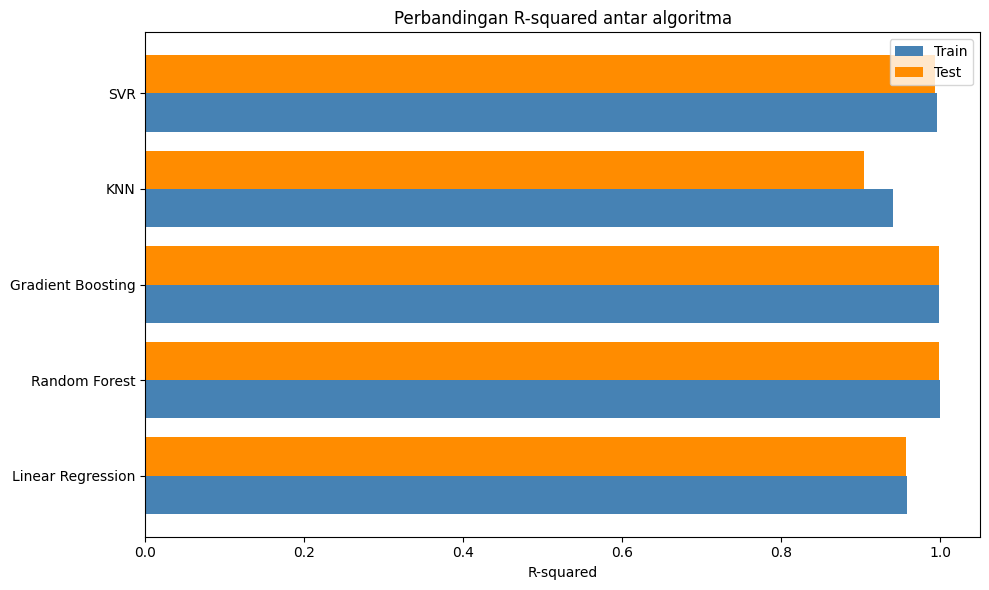

In [376]:
# List model
models = {
    'Linear Regression': linear_model_drop,
    'Random Forest': best_forest_model,
    'Gradient Boosting': gb_model_drop,
    'KNN': knn_model,
    'SVR': svr_model
}

# Simpan hasil R2 untuk train & test
r2_train = []
r2_test = []

for name, model in models.items():
    if name in ['KNN', 'SVR']:
        X_train_used = X_train_scaled_df
        X_test_used = X_test_scaled_df
        y_train_used = y_train_scaled if name == 'SVR' else y_train
    else:
        X_train_used = X_train_processed_drop_df
        X_test_used = X_test_processed_drop_df
        y_train_used = y_train

    # Prediksi
    y_pred_train = model.predict(X_train_used)
    y_pred_test = model.predict(X_test_used)

    # Inverse transform untuk SVR
    if name == 'SVR':
        y_pred_train = y_scaler.inverse_transform(y_pred_train.reshape(-1, 1)).ravel()
        y_pred_test = y_scaler.inverse_transform(y_pred_test.reshape(-1, 1)).ravel()
        y_train_used = y_train  # karena kita bandingkan dengan target asli

    # Simpan skor
    r2_train.append(r2_score(y_train_used, y_pred_train))
    r2_test.append(r2_score(y_test, y_pred_test))

# Plot bar chart horizontal
bar_width = 0.4
index = np.arange(len(models))

plt.figure(figsize=(10, 6))
plt.barh(index - bar_width/2, r2_train, bar_width, label='Train', color='steelblue')
plt.barh(index + bar_width/2, r2_test, bar_width, label='Test', color='darkorange')

plt.yticks(index, list(models.keys()))
plt.xlabel('R-squared')
plt.title('Perbandingan R-squared antar algoritma')
plt.xlim(0, 1.05)
plt.legend()
plt.tight_layout()
plt.show()

Berdasarkan visualisasi R-squared dari berbagai algoritma regresi, dapat dilihat bahwa hampir semua model menunjukkan performa prediktif yang sangat baik dengan nilai R-squared mendekati 1 pada data pelatihan dan pengujian. Model seperti **XGBoost**, **Gradient Boosting**, dan **Random Forest** tampil sebagai yang paling andal, dengan konsistensi tinggi antara data training dan testing, menunjukkan kemampuan generalisasi yang kuat. **KNN** memiliki sedikit penurunan performa pada data uji, namun tetap tergolong baik. **SVR** juga memberikan hasil yang solid setelah dilakukan scaling pada target. Sementara itu, model dasar seperti **Linear Regression** dan **Decision Tree** masih kompetitif, namun sedikit tertinggal dibanding model ansambel. Secara keseluruhan, model boosting dan ensemble terbukti unggul dalam memodelkan hubungan kompleks pada dataset ini.


In [377]:
# Fungsi evaluasi model
def evaluasi_model(y_test, y_pred, nama_model):
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    return {"Model": nama_model, "MSE": mse, "RMSE": rmse, "MAE": mae, "R2": r2}

# Evaluasi semua model
hasil_evaluasi = []
hasil_evaluasi.append(evaluasi_model(y_test, y_pred_linear_drop, "Linear Regression"))
hasil_evaluasi.append(evaluasi_model(y_test, y_pred_best_forest, "Random Forest"))
hasil_evaluasi.append(evaluasi_model(y_test, y_pred_gb_drop, "Gradient Boosting"))
hasil_evaluasi.append(evaluasi_model(y_test, y_pred_knn, "K-Nearest Neighbors (K=5)"))
hasil_evaluasi.append(evaluasi_model(y_test, y_pred_svr, "Support Vector Regression"))

# DataFrame hasil
df_evaluasi = pd.DataFrame(hasil_evaluasi)

# Ranking per metrik
df_evaluasi['Rank_MSE'] = df_evaluasi['MSE'].rank(ascending=True)
df_evaluasi['Rank_RMSE'] = df_evaluasi['RMSE'].rank(ascending=True)
df_evaluasi['Rank_MAE'] = df_evaluasi['MAE'].rank(ascending=True)
df_evaluasi['Rank_R2'] = df_evaluasi['R2'].rank(ascending=False)

# Total skor ranking
df_evaluasi['Total_Score'] = df_evaluasi['Rank_MSE'] + df_evaluasi['Rank_RMSE'] + df_evaluasi['Rank_MAE'] + df_evaluasi['Rank_R2']

# Menentukan model terbaik (skor total terendah = terbaik)
best_model = df_evaluasi.loc[df_evaluasi['Total_Score'].idxmin()]

# Tampilkan tabel evaluasi dengan ranking
print("\nTabel Evaluasi Semua Model dengan Ranking:")
print(df_evaluasi[['Model', 'MSE', 'RMSE', 'MAE', 'R2', 'Rank_MSE', 'Rank_RMSE', 'Rank_MAE', 'Rank_R2', 'Total_Score']])

# Hasil model terbaik
print(f"\nModel terbaik berdasarkan gabungan semua metrik: {best_model['Model']} (Total Score = {best_model['Total_Score']:.0f})")


Tabel Evaluasi Semua Model dengan Ranking:
                       Model              MSE      RMSE       MAE   R2  \
0          Linear Regression 2,672,378,391.21 51,695.05 39,515.84 0.96   
1              Random Forest    64,171,992.36  8,010.74  6,175.19 1.00   
2          Gradient Boosting    94,071,218.79  9,699.03  7,470.66 1.00   
3  K-Nearest Neighbors (K=5) 5,944,692,875.42 77,101.83 61,829.45 0.90   
4  Support Vector Regression   385,510,196.76 19,634.41 15,119.92 0.99   

   Rank_MSE  Rank_RMSE  Rank_MAE  Rank_R2  Total_Score  
0      4.00       4.00      4.00     4.00        16.00  
1      1.00       1.00      1.00     1.00         4.00  
2      2.00       2.00      2.00     2.00         8.00  
3      5.00       5.00      5.00     5.00        20.00  
4      3.00       3.00      3.00     3.00        12.00  

Model terbaik berdasarkan gabungan semua metrik: Random Forest (Total Score = 4)


### Penjelasan:

- Setelah melakukan serangkaian eksperimen dan evaluasi terhadap beberapa algoritma regresi, yaitu Linear Regression, Random Forest, Gradient Boosting, dan K-Nearest Neighbors (KNN), dan Support Vector Regression (SVR), model **Random Forest Regressor terpilih sebagai model terbaik** untuk memprediksi revenue restoran.

- Keputusan ini didasarkan pada performa Random Forest terbaik di hampir semua metrik evaluasi, termasuk Mean Squared Error (MSE), Root Mean Squared Error (RMSE), Mean Absolute Error (MAE), dan R-squared (R²). Nilai MSE dan RMSE yang rendah menunjukkan bahwa prediksi revenue oleh Random Forest memiliki tingkat kesalahan kecil, sedangkan nilai R² yang tinggi mencerminkan kemampuan model dalam menjelaskan variasi revenue berdasarkan fitur-fitur restoran.

- Keunggulan Random Forest terletak pada teknik ensemble yang memanfaatkan banyak decision tree sekaligus, sehingga mampu menangkap pola data yang kompleks sekaligus mengurangi risiko overfitting. Meskipun Gradient Boosting juga menunjukkan performa mendekati Random Forest, hasil evaluasi menunjukkan Random Forest lebih unggul secara konsisten dalam akurasi prediksi revenue restoran.

- Di sisi lain, model KNN mencatatkan kinerja terburuk dengan error prediksi yang tinggi dan R² terendah, menunjukkan bahwa pendekatan berbasis tetangga kurang efektif untuk data revenue restoran. Sementara itu, Linear Regression dan SVR menunjukkan hasil moderat, namun tidak seakurat model ensemble dalam memahami hubungan kompleks antar fitur.

- Secara keseluruhan, Random Forest Regressor menjadi pilihan terbaik dalam memodelkan prediksi revenue restoran karena keseimbangan antara akurasi tinggi, kemampuan generalisasi, dan stabilitas performa di berbagai metrik evaluasi. Hasil ini menjadi dasar yang kuat untuk menggunakan Random Forest dalam implementasi prediksi revenue di dunia nyata.

# Analisis Feature Importance

Analisis feature importance dilakukan untuk mengetahui fitur-fitur yang paling berpengaruh terhadap prediksi revenue restoran di berbagai model. Hasil analisis menunjukkan bahwa average meal price dan seating capacity secara konsisten menjadi fitur paling penting di semua model berbasis pohon (Random Forest dan Gradient Boosting). Marketing budget dan social media followers juga muncul sebagai faktor signifikan, terutama di Random Forest dan Gradient Boosting. Sementara itu, fitur-fitur seperti location dan cuisine lebih menonjol di Linear Regression, meskipun kontribusinya relatif kecil dibanding fitur numerik utama.

In [378]:
# Model 1: Linear Regression
linear_model_for_importance = linear_model_drop

coefficients = linear_model_for_importance.coef_
feature_names = X_train_processed_drop_df.columns

importance_df = pd.DataFrame({'Feature': feature_names, 'Coefficient': coefficients})
importance_df['Absolute Coefficient'] = abs(importance_df['Coefficient'])
importance_df = importance_df.sort_values(by='Absolute Coefficient', ascending=False)

print("Feature Importance (Linear Regression - berdasarkan koefisien):")
print(importance_df)

Feature Importance (Linear Regression - berdasarkan koefisien):
                     Feature  Coefficient  Absolute Coefficient
13        Average Meal Price    12,740.76             12,740.76
12          Seating Capacity    10,313.45             10,313.45
4             Cuisine_French     7,008.26              7,008.26
7           Cuisine_Japanese    -6,779.76              6,779.76
1             Location_Rural    -4,374.77              4,374.77
2          Location_Suburban     3,325.85              3,325.85
6            Cuisine_Italian     3,191.12              3,191.12
8            Cuisine_Mexican    -2,357.97              2,357.97
5             Cuisine_Indian    -1,077.44              1,077.44
0          Location_Downtown     1,048.92              1,048.92
16     Chef Experience Years       979.36                979.36
20     Service Quality Score       377.71                377.71
10  Parking Availability_Yes       254.76                254.76
9    Parking Availability_No      -254.7

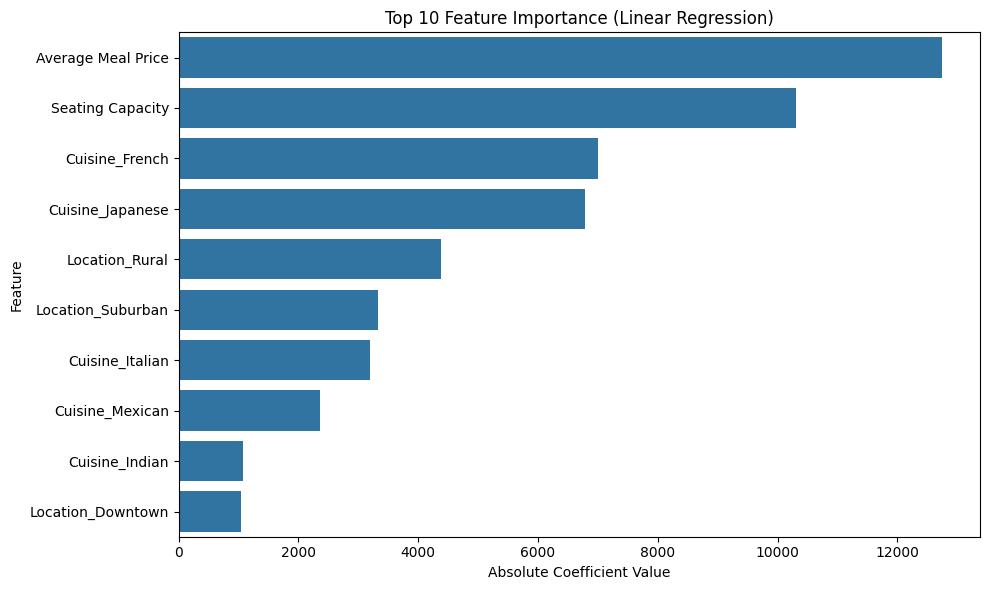

In [379]:
# Menampilkan 10 fitur teratas untuk Algoritma Linear Regression
n_top_features = 10
top_importance_df = importance_df.head(n_top_features)

plt.figure(figsize=(10, 6))
sns.barplot(x='Absolute Coefficient', y='Feature', data=top_importance_df)
plt.title(f'Top {n_top_features} Feature Importance (Linear Regression)')
plt.xlabel('Absolute Coefficient Value')
plt.ylabel('Feature')
plt.tight_layout()
plt.show()

**Hasil feature importance pada Linear Regression** menunjukkan bahwa Average Meal Price dan Seating Capacity memiliki pengaruh terbesar terhadap prediksi revenue restoran. Selain itu, jenis masakan seperti Japanese dan Mexican juga berkontribusi signifikan. Faktor lain seperti lokasi dan rating memberikan pengaruh tambahan namun dengan kontribusi yang lebih kecil.

In [380]:
# Model 2 : Random Forest Regressor
rf_model_for_importance = best_forest_model

feature_names = X_train_processed_drop_df.columns

importances = rf_model_for_importance.feature_importances_

importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

print("\nFeature Importance (Random Forest Regressor):")
print(importance_df)


Feature Importance (Random Forest Regressor):
                     Feature  Importance
12          Seating Capacity        0.51
13        Average Meal Price        0.49
2          Location_Suburban        0.00
0          Location_Downtown        0.00
16     Chef Experience Years        0.00
18         Avg Review Length        0.00
22      Weekday Reservations        0.00
17         Number of Reviews        0.00
20     Service Quality Score        0.00
21      Weekend Reservations        0.00
19            Ambience Score        0.00
15    Social Media Followers        0.00
14          Marketing Budget        0.00
1             Location_Rural        0.00
11                    Rating        0.00
6            Cuisine_Italian        0.00
4             Cuisine_French        0.00
7           Cuisine_Japanese        0.00
9    Parking Availability_No        0.00
10  Parking Availability_Yes        0.00
3           Cuisine_American        0.00
5             Cuisine_Indian        0.00
8         

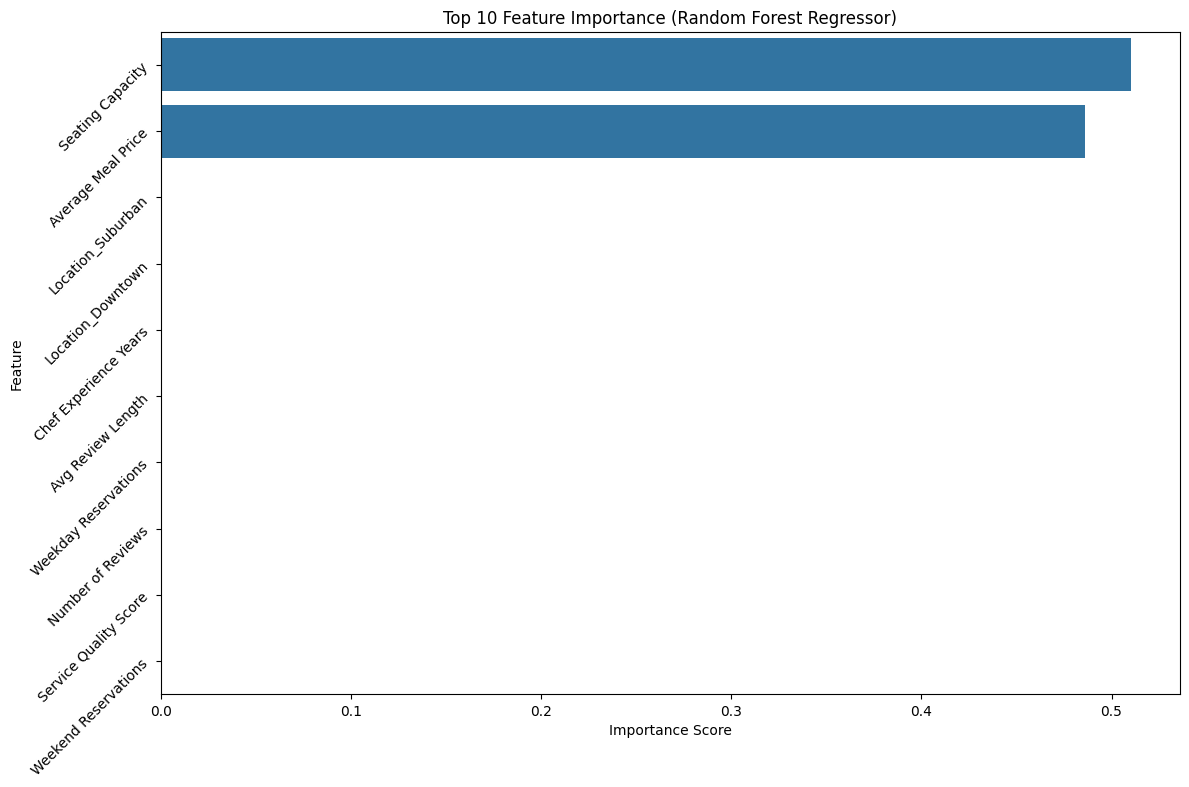

In [381]:
# Menampilkan 10 fitur teratas untuk Algoritma Random Forest Regressor
n_top_features = 10
top_importance_df = importance_df.head(n_top_features)

plt.figure(figsize=(12, 8))
sns.barplot(x='Importance', y='Feature', data=top_importance_df)
plt.title(f'Top {n_top_features} Feature Importance (Random Forest Regressor)')
plt.xlabel('Importance Score')
plt.ylabel('Feature')
plt.yticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

**Hasil feature importance pada Random Forest Regressor** sangat menekankan pada fitur Seating Capacity dan Average Meal Price sebagai faktor utama dalam memprediksi revenue restoran. Fitur lain seperti Location dan Chef Experience Years dianggap penting, namun kontribusinya jauh lebih kecil dibanding dua fitur utama tersebut. Kesamaan fitur terpenting antara Decision Tree dan Random Forest ini wajar terjadi, mengingat keduanya merupakan model berbasis pohon yang cenderung memprioritaskan fitur dengan pembagian (split) terbaik di awal struktur pohon.

In [382]:
# Model 3 : Gradient Boosting Regressor
gb_model_for_importance = gb_model_drop

# Menggunakan fitur dari data latih:
feature_names = X_train_processed_drop_df.columns

importances = gb_model_for_importance.feature_importances_

importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

print("\nFeature Importance (Gradient Boosting Regressor):")
print(importance_df)


Feature Importance (Gradient Boosting Regressor):
                     Feature  Importance
12          Seating Capacity        0.51
13        Average Meal Price        0.48
0          Location_Downtown        0.01
16     Chef Experience Years        0.00
15    Social Media Followers        0.00
14          Marketing Budget        0.00
20     Service Quality Score        0.00
19            Ambience Score        0.00
21      Weekend Reservations        0.00
22      Weekday Reservations        0.00
3           Cuisine_American        0.00
4             Cuisine_French        0.00
6            Cuisine_Italian        0.00
18         Avg Review Length        0.00
1             Location_Rural        0.00
5             Cuisine_Indian        0.00
2          Location_Suburban        0.00
11                    Rating        0.00
10  Parking Availability_Yes        0.00
7           Cuisine_Japanese        0.00
8            Cuisine_Mexican        0.00
9    Parking Availability_No        0.00
17    

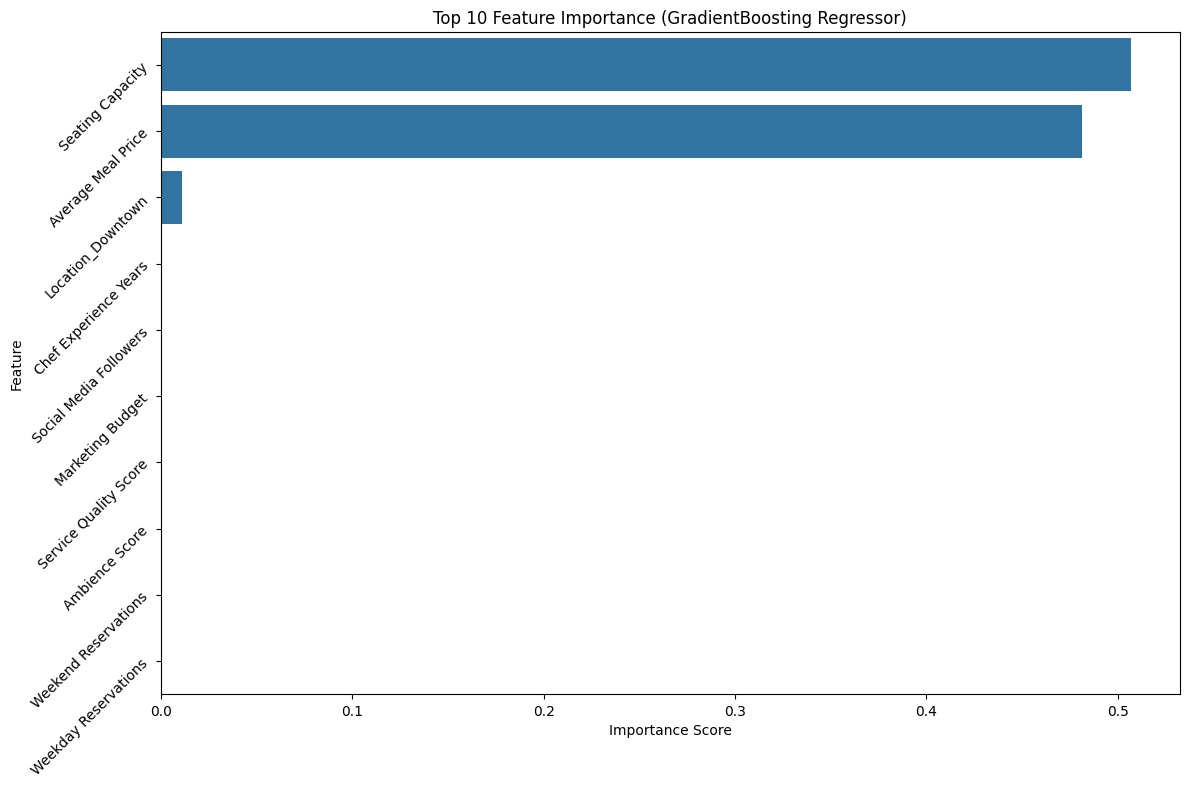

In [383]:
# Menampilkan 10 fitur teratas untuk Algoritma GradientBoosting Regressor
n_top_features = 10
top_importance_df = importance_df.head(n_top_features)

plt.figure(figsize=(12, 8))
sns.barplot(x='Importance', y='Feature', data=top_importance_df)
plt.title(f'Top {n_top_features} Feature Importance (GradientBoosting Regressor)')
plt.xlabel('Importance Score')
plt.ylabel('Feature')
plt.yticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

**Model Gradient Boosting Regressor** menunjukkan bahwa Seating Capacity dan Average Meal Price kembali menjadi dua fitur paling dominan dalam memprediksi revenue restoran. Fitur Location (Downtown) juga muncul sebagai faktor penting, meski kontribusinya jauh lebih kecil. Pola kesamaan fitur penting dengan Decision Tree dan Random Forest mencerminkan karakteristik Gradient Boosting yang menggabungkan kekuatan pohon-pohon sederhana untuk memperbaiki kesalahan secara bertahap, namun tetap mengutamakan fitur dengan pengaruh terbesar di awal.

# Prediksi

Tahapan prediksi dimulai dengan menggunakan model yang telah dilatih (Linear Regression, Random Forest, Gradient Boosting, KNN, dan SVR) untuk memprediksi revenue restoran pada data uji. Hasil prediksi kemudian dibandingkan dengan nilai aktual guna mengevaluasi akurasi setiap model. Langkah ini bertujuan untuk mengukur seberapa baik model dapat memproyeksikan revenue berdasarkan fitur-fitur yang tersedia.

In [384]:
# Prediksi dari ke-5 model untuk data test
y_pred_linear = linear_model_drop.predict(X_test_processed_drop_df)
y_pred_rf = best_forest_model.predict(X_test_processed_drop_df)
y_pred_gb = gb_model_drop.predict(X_test_processed_drop_df)
y_pred_knn = knn_model.predict(X_test_scaled_df)
y_pred_svr = y_scaler.inverse_transform(svr_model.predict(X_test_scaled_df).reshape(-1, 1)).ravel()

pd.options.display.float_format = '{:,.2f}'.format

# Buat DataFrame untuk membandingkan hasil prediksi
df_prediksi = pd.DataFrame({
    'y_true': y_test[:5].values,
    'prediksi_Linear': y_pred_linear[:5],
    'prediksi_RF': y_pred_rf[:5],
    'prediksi_Boosting': y_pred_gb[:5],
    'prediksi_KNN': y_pred_knn[:5],
    'prediksi_SVR': y_pred_svr[:5]
})

# Tampilkan hasil
df_prediksi

,y_true,prediksi_Linear,prediksi_RF,prediksi_Boosting,prediksi_KNN,prediksi_SVR
0,"236,810.40","142,337.80","240,008.73","235,705.17","369,354.93","231,785.98"
1,"586,990.35","595,554.98","584,126.90","587,234.68","443,332.95","572,314.90"
2,"969,731.17","942,084.71","983,650.77","972,765.58","815,239.81","936,092.22"
3,"469,665.70","522,554.95","472,276.90","468,642.72","564,895.36","458,032.61"
4,"1,148,558.49","1,072,283.35","1,150,535.00","1,132,257.93","967,006.97","1,075,307.32"


Tabel di atas membandingkan hasil prediksi revenue restoran dari lima model regresi terhadap nilai aktual (`y_true`). Secara umum, model **Random Forest**, **Gradient Boosting**, dan **SVR** menunjukkan performa prediktif yang sangat baik, dengan estimasi yang konsisten mendekati nilai sebenarnya di hampir semua baris. Sebaliknya, **Linear Regression** dan terutama **KNN** memperlihatkan deviasi prediksi yang lebih besar pada beberapa kasus, seperti baris ke-0 dan ke-1. Hasil ini konsisten dengan evaluasi sebelumnya yang menunjukkan bahwa model berbasis ansambel dan kernel (SVR) lebih akurat dan mampu menangkap pola kompleks pada data revenue restoran dibandingkan model linier sederhana atau pendekatan berbasis tetangga terdekat.
